In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv('atlas-higgs-challenge-2014-v2.csv')

In [92]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [93]:
#df['Label'].replace('s',1,inplace=True)

In [94]:
#df['Label'].replace('b',0,inplace=True)

In [95]:
dfMb= df['DER_mass_MMC'][df['Label']=='b']
dfMs= df['DER_mass_MMC'][df['Label']=='s']

Text(0.5,0,'DER_mass_MMC')

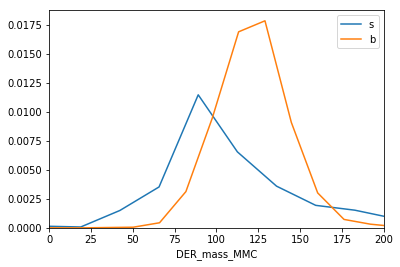

In [96]:
sns.kdeplot(dfMb,label='s')
sns.kdeplot(dfMs,label='b')
plt.xlim((0,200))
plt.xlabel('DER_mass_MMC')

In [97]:
dfMTb= df['DER_mass_transverse_met_lep'][df['Label']=='b']
dfMTs= df['DER_mass_transverse_met_lep'][df['Label']=='s']

Text(0.5,0,'DER_mass_transverse_met_lep')

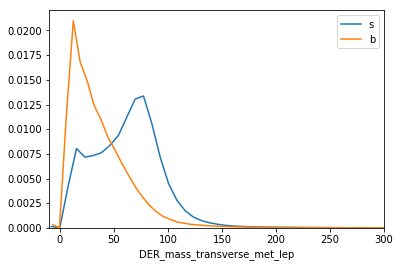

In [98]:
sns.kdeplot(dfMTb,label='s')
sns.kdeplot(dfMTs,label='b')
plt.xlim((-10,300))
plt.xlabel('DER_mass_transverse_met_lep')

In [99]:
df['Label'].value_counts()

b    538678
s    279560
Name: Label, dtype: int64

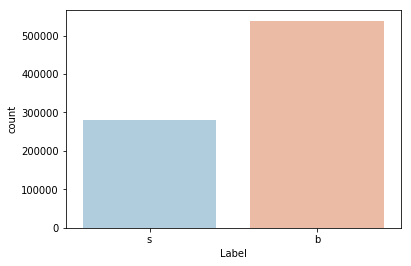

In [100]:
sns.countplot(x='Label',data=df,palette='RdBu_r')

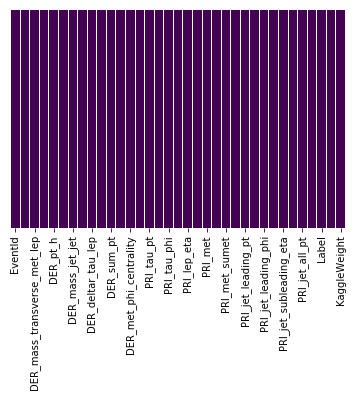

In [101]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
df['Label'].replace('s',1,inplace=True)

In [103]:
df['Label'].replace('b',0,inplace=True)

In [104]:
dfTrain=df[df['KaggleSet']=='t']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
dfTrain.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label', 'KaggleSet', 'KaggleWeight'],
      dtype='object')

In [107]:
dfTrain=dfTrain.drop(['EventId','Weight','KaggleSet','KaggleWeight'],axis=1)

In [108]:
dfTrain.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [109]:
X_train, X_test, y_train, y_test = train_test_split(dfTrain.drop('Label',axis=1), 
                                                    dfTrain['Label'], test_size=0.30, 
                                                    random_state=101)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
predictions = logmodel.predict(X_test)

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.86      0.82     49257
          1       0.67      0.52      0.59     25743

avg / total       0.74      0.75      0.74     75000

